In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('train.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB
None


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
# convert string to datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], format="%d-%m-%Y %H:%M")

# adjust columns
del df['ID']
df.columns = ['ds', 'y']
df.index = df.ds
del df['ds']
df.head()

,y
ds,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [4]:
# resample data (group by day)
df = df.resample('D').sum()
df['ds'] = df.index
df.head()

,y,ds
ds,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


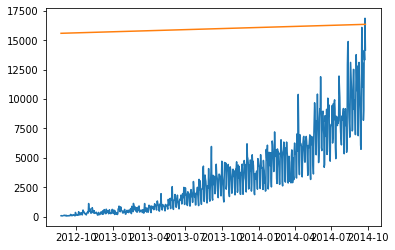

In [5]:
# virualization
plt.plot(df)

In [6]:
# fit model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


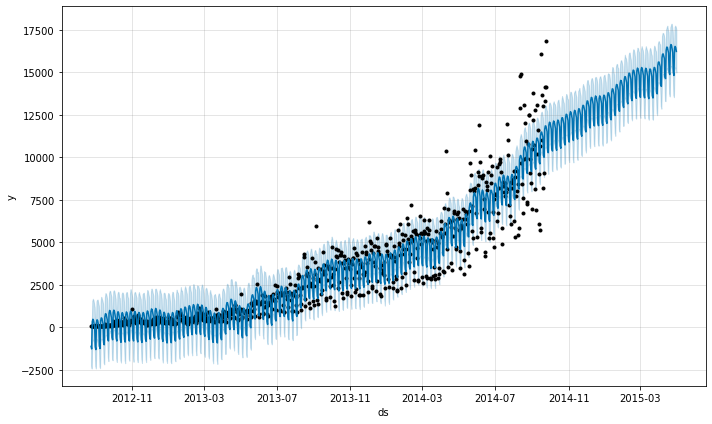

In [7]:
# predict & plot
future = model.make_future_dataframe(periods=7*31)
forecast = model.predict(future)
model.plot(forecast)
plt.show()

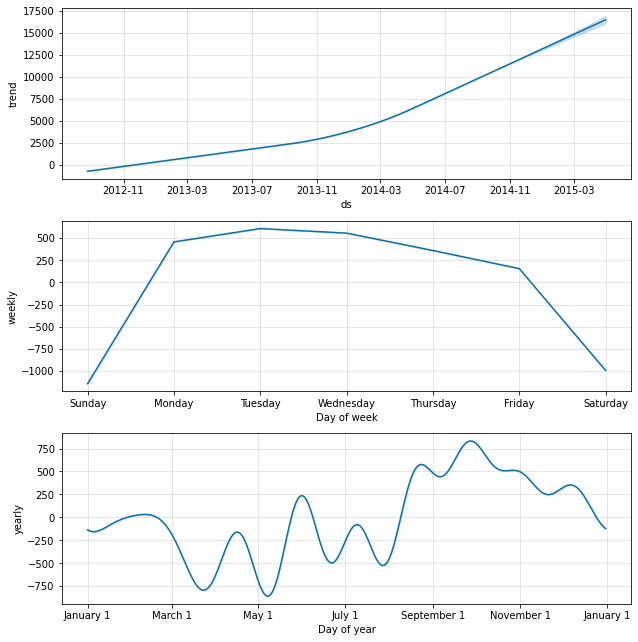

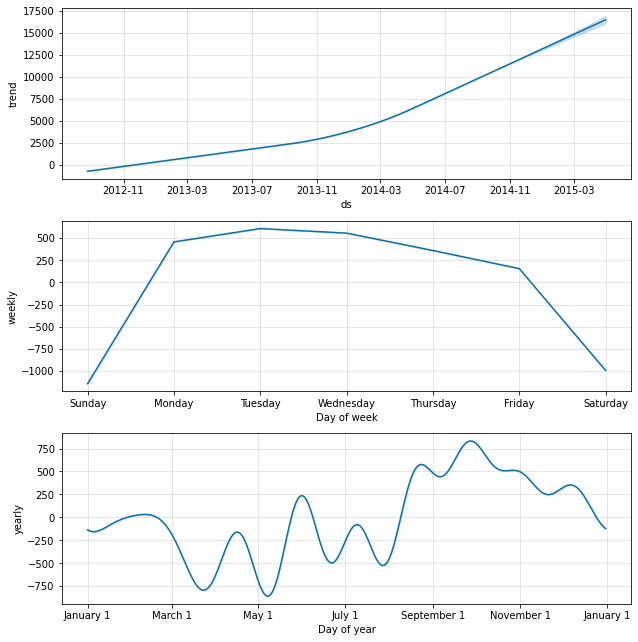

In [8]:
model.plot_components(forecast)

In [9]:
# show Prophet usage
print(Prophet.__doc__)

Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear' or 'logistic' to specify a linear or logistic
        trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoints` is not supplied,
        then n_changepoints potential changepoints are selected uniformly from
        the first `changepoint_range` proportion of the history.
    changepoint_range: Proportion of history in which trend changepoints will
        be estimated. Defaults to 0.8 for the first 80%. Not used if
        `changepoints` is specified.
    yearly_seasonality: Fit yearly seasonality.
        Can be 'auto', True, False, or a number of Fourier terms to generate.
    weekly_seasonality: Fit weekly seasonality.
        Can be 'auto', True, False, or a number of 

In [10]:
# try to tune some parameters
df['floor'] = 0  # traffic should be positive
df['cap'] = 25000
model = Prophet(growth='logistic', n_changepoints=20, changepoint_prior_scale=0.2)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[[<matplotlib.lines.Line2D at 0x7ff12bb59ba8>],

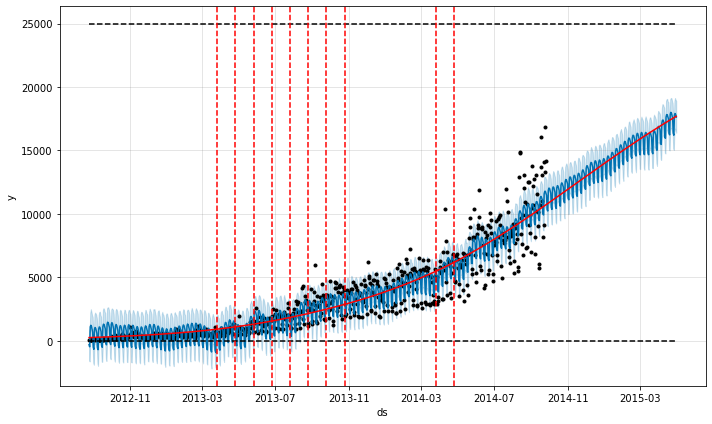

In [11]:
# predict & plot
future['floor'] = 0
future['cap'] = 25000
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)

In [12]:
forecast

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,247.932848,25000,0,-1534.815518,876.591714,247.932848,247.932848,-549.135414,-549.135414,...,-998.682945,-998.682945,-998.682945,449.547531,449.547531,449.547531,0.0,0.0,0.0,-301.202566
1,2012-08-26,249.467614,25000,0,-1633.286354,693.606737,249.467614,249.467614,-726.470230,-726.470230,...,-1146.483850,-1146.483850,-1146.483850,420.013619,420.013619,420.013619,0.0,0.0,0.0,-477.002617
2,2012-08-27,251.011784,25000,0,-128.481988,2218.036963,251.011784,251.011784,844.937761,844.937761,...,456.596379,456.596379,456.596379,388.341382,388.341382,388.341382,0.0,0.0,0.0,1095.949545
3,2012-08-28,252.565415,25000,0,75.002943,2492.028180,252.565415,252.565415,964.045795,964.045795,...,608.520299,608.520299,608.520299,355.525496,355.525496,355.525496,0.0,0.0,0.0,1216.611210
4,2012-08-29,254.128563,25000,0,-54.536730,2284.515950,254.128563,254.128563,880.747079,880.747079,...,558.185045,558.185045,558.185045,322.562034,322.562034,322.562034,0.0,0.0,0.0,1134.875642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2015-04-26,17584.629044,25000,0,15040.413683,17429.676002,17392.937514,17767.545839,-1382.695339,-1382.695339,...,-1146.483850,-1146.483850,-1146.483850,-236.211490,-236.211490,-236.211490,0.0,0.0,0.0,16201.933704
975,2015-04-27,17612.770421,25000,0,16475.593893,18915.865382,17419.815444,17796.658344,171.717224,171.717224,...,456.596379,456.596379,456.596379,-284.879154,-284.879154,-284.879154,0.0,0.0,0.0,17784.487646
976,2015-04-28,17640.849697,25000,0,16728.816661,19137.039972,17447.328823,17825.668162,273.759265,273.759265,...,608.520299,608.520299,608.520299,-334.761034,-334.761034,-334.761034,0.0,0.0,0.0,17914.608961
977,2015-04-29,17668.866667,25000,0,16573.700337,19003.087384,17473.364155,17854.838926,173.430205,173.430205,...,558.185045,558.185045,558.185045,-384.754841,-384.754841,-384.754841,0.0,0.0,0.0,17842.296872
